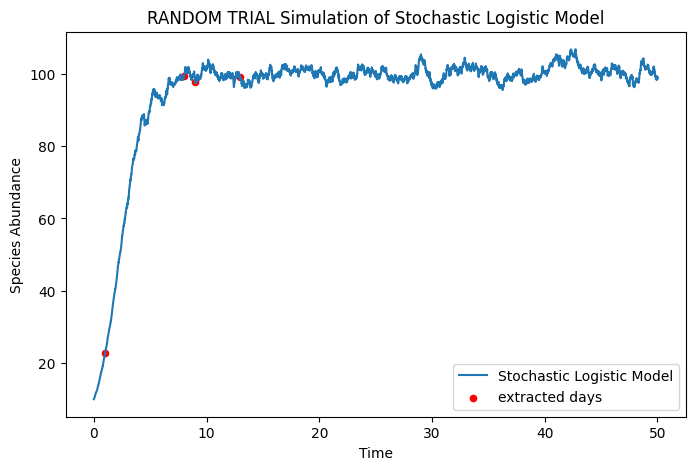

In [ ]:
# Define the function to simulate a stochastic logistic model
import numpy as np
import matplotlib.pyplot as plt



def simulate_SLM(ab0, K, sigma, tau, steps, dt): 
    ab_vals = np.zeros(int(steps) + 1) 
    ab_vals[0] = ab0
    for t in range(1, steps + 1): 
        ab = ab_vals[t-1]
        ab_vals[t] = max(0, ab + dt * ( (ab/tau)*(1 - (ab / K)) +  ab * np.sqrt(sigma/tau) * np.random.normal() ) )
    return ab_vals


# Model parameters
ab0 = 10   # Initial population size
K = 100    # Carrying capacity
sigma = 0.1  # Noise intensity
tau = 1.0  # Characteristic time scale

# Simulation parameters
dt = 0.01 # time step 
steps = 5000  # Number of steps

ab_vals = simulate_SLM(ab0, K, sigma, tau, steps, dt)

# Plot results
time_vals = np.linspace(0, steps * dt, steps + 1)
plt.figure(figsize=(8, 5))
plt.plot(time_vals, ab_vals, label="Stochastic Logistic Model")
plt.xlabel("Time")
plt.ylabel("Species Abundance")
plt.title("RANDOM TRIAL Simulation of Stochastic Logistic Model")
plt.legend()

# Extract a subset of measures
days_to_extract = np.array([1,8,9,13], dtype = int)
nsteps_per_day = int(1/dt) # 100
indexes_to_extract = days_to_extract * nsteps_per_day


plt.scatter(days_to_extract, ab_vals[indexes_to_extract], color = "red", s= 20, label= "extracted days")
plt.legend()
plt.show() 